# Case Study: Analyzing Bumble Profiles

This notebook addresses various data analysis tasks including data cleaning, processing, and insights generation for Bumble profiles. The tasks are structured into four parts:

1. **Data Cleaning**
2. **Data Processing**
3. **Data Analysis**
4. **Data Visualization**

## Part 1: Data Cleaning

This section focuses on inspecting missing data, fixing data types, and handling outliers. We'll also visualize missing data patterns to guide cleaning decisions.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('bumble.csv')

# Display basic information about the dataset
data.info()
# Show the first few rows of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   gender       59946 non-null  object 
 3   body_type    54650 non-null  object 
 4   diet         35551 non-null  object 
 5   drinks       56961 non-null  object 
 6   education    53318 non-null  object 
 7   ethnicity    54266 non-null  object 
 8   height       59943 non-null  float64
 9   income       59946 non-null  int64  
 10  job          51748 non-null  object 
 11  last_online  59946 non-null  object 
 12  location     59946 non-null  object 
 13  pets         40025 non-null  object 
 14  religion     39720 non-null  object 
 15  sign         48890 non-null  object 
 16  speaks       59896 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 7.8+ MB


,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (..."
2,38,available,m,thin,anything,socially,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",has cats,NaN,pisces but it doesn&rsquo;t matter,"english, french, c++"
3,23,single,m,thin,vegetarian,socially,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",likes cats,NaN,pisces,"english, german (poorly)"
4,29,single,m,athletic,NaN,socially,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",likes dogs and likes cats,NaN,aquarius,english


In [3]:
data['last_online']

0        2012-06-28-20-30
1        2012-06-29-21-41
2        2012-06-27-09-10
3        2012-06-28-14-22
4        2012-06-27-21-26
               ...       
59941    2012-06-12-21-47
59942    2012-06-29-11-01
59943    2012-06-27-23-37
59944    2012-06-23-13-01
59945    2012-06-29-00-42
Name: last_online, Length: 59946, dtype: object

In [4]:
data['last_online'] = pd.to_datetime(data['last_online'], format='%Y-%m-%d-%H-%M')

In [5]:
print(data['last_online'].isnull().sum())

0


### Inspecting Missing Data
Check which columns have missing values and calculate the percentage of missing data in each column.

In [6]:
# Calculate missing values percentage
missing_data = data.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data

diet         40.694959
religion     33.740366
pets         33.231575
sign         18.443266
job          13.675641
education    11.056618
ethnicity     9.475194
body_type     8.834618
drinks        4.979482
speaks        0.083408
height        0.005005
dtype: float64

### Dropping Columns with >50% Missing Data

In [7]:
# Drop columns where more than 50% of data is missing
data = data.loc[:, data.isnull().mean() <= 0.5]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   age          59946 non-null  int64         
 1   status       59946 non-null  object        
 2   gender       59946 non-null  object        
 3   body_type    54650 non-null  object        
 4   diet         35551 non-null  object        
 5   drinks       56961 non-null  object        
 6   education    53318 non-null  object        
 7   ethnicity    54266 non-null  object        
 8   height       59943 non-null  float64       
 9   income       59946 non-null  int64         
 10  job          51748 non-null  object        
 11  last_online  59946 non-null  datetime64[ns]
 12  location     59946 non-null  object        
 13  pets         40025 non-null  object        
 14  religion     39720 non-null  object        
 15  sign         48890 non-null  object        
 16  spea

### Handling Missing Numerical Data
Impute missing values for numerical columns using the median of relevant categories.

In [8]:
# Define a function to impute missing numerical data by median within relevant groups
def impute_by_group(df, col, group_cols):
    df[col] = df.groupby(group_cols)[col].transform(
        lambda x: x.fillna(x.median())
    )
    return df

# Impute missing height and income by gender and status
data = impute_by_group(data, 'height', ['gender', 'status'])
data = impute_by_group(data, 'income', ['gender', 'status'])

### Handling Outliers

In [7]:
# Replace -1 in income with 0
data['income'] = data['income'].replace(-1, 0)

# Calculate trimmed mean and median by removing extreme 10% of values
def trimmed_mean_median(series):
    lower, upper = np.percentile(series.dropna(), [10, 90])
    trimmed = series[(series >= lower) & (series <= upper)]
    return trimmed.mean(), trimmed.median()

# Example for height
mean_height, median_height = trimmed_mean_median(data['height'])
mean_height, median_height

(68.23091633466136, 68.0)

### Visualizing Missing Data

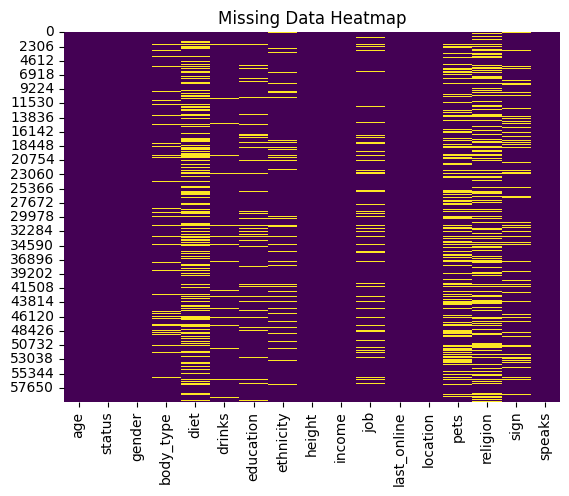

In [8]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## Part 2: Data Processing

This section involves grouping continuous variables, creating derived features, and standardizing units for consistency.

### Binning and Grouping
We will bin the `age` column into age groups and categorize income levels into meaningful thresholds.

In [9]:
# Binning age into age groups
age_bins = [18, 25, 35, 45, 100]
age_labels = ['18-25', '26-35', '36-45', '46+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Grouping income into categories
income_bins = [-1, 30000, 70000, 200000]
income_labels = ['Low Income', 'Medium Income', 'High Income']
data['income_group'] = pd.cut(data['income'], bins=income_bins, labels=income_labels, right=False)
data[['age_group', 'income_group']].head()

,age_group,income_group
0,18-25,Low Income
1,36-45,High Income
2,36-45,Low Income
3,18-25,Low Income
4,26-35,Low Income


### Derived Features
Create new features such as `profile_completeness` and convert height to cm.

In [10]:
# Calculate profile completeness
data['profile_completeness'] = data.notnull().mean(axis=1) * 100

# Convert height to cm
data['height_cm'] = data['height'] * 2.54
data[['profile_completeness', 'height_cm']].head()

,profile_completeness,height_cm
0,100.000000,190.50
1,100.000000,177.80
2,84.210526,172.72
3,94.736842,180.34
4,89.473684,167.64


## Part 3: Data Analysis

This section focuses on exploring demographic distributions, correlations, and patterns in the data.

### Demographic Analysis

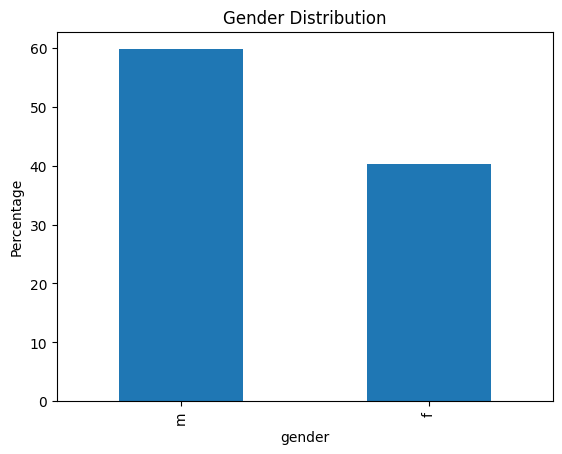

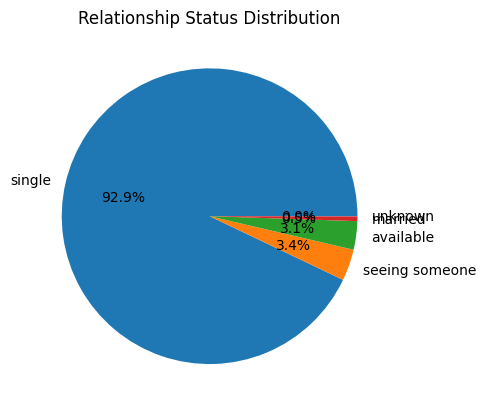

In [11]:
# Gender distribution
gender_counts = data['gender'].value_counts(normalize=True) * 100
gender_counts.plot(kind='bar', title='Gender Distribution', ylabel='Percentage')
plt.show()

# Status proportions
status_counts = data['status'].value_counts(normalize=True) * 100
status_counts.plot(kind='pie', autopct='%1.1f%%', title='Relationship Status Distribution')
plt.ylabel('')
plt.show()

### Correlation Analysis

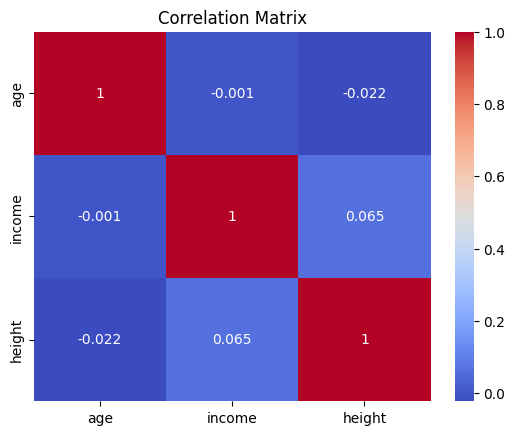

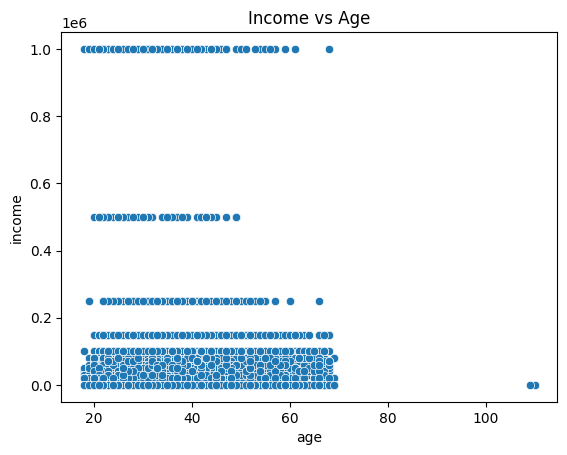

In [12]:
# Correlation between numerical columns
correlations = data[['age', 'income', 'height']].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Age vs Income
sns.scatterplot(x='age', y='income', data=data)
plt.title('Income vs Age')
plt.show()

### Diet and Lifestyle Analysis

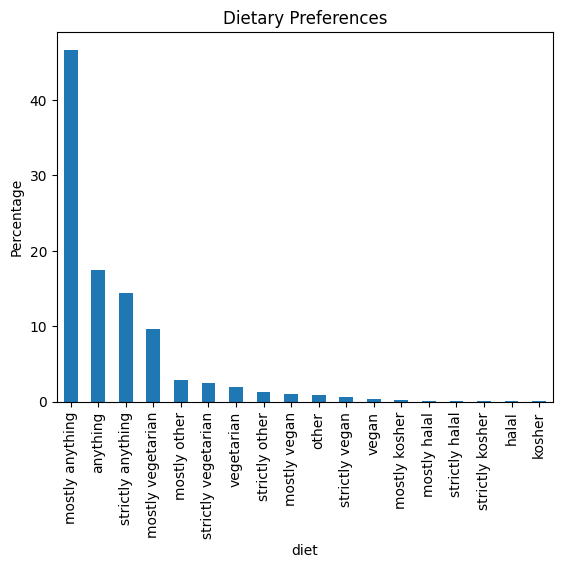

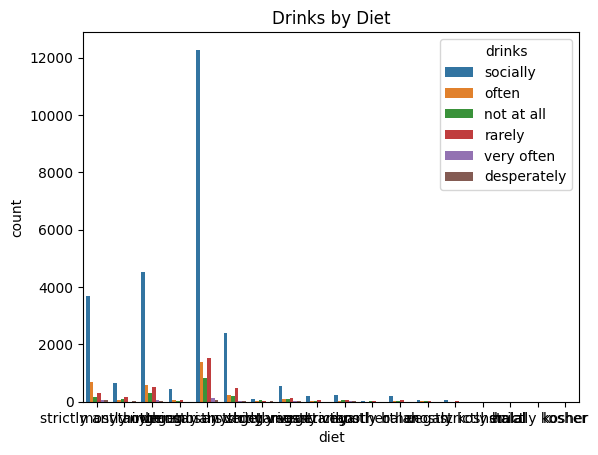

In [13]:
# Dietary preferences
diet_counts = data['diet'].value_counts(normalize=True) * 100
diet_counts.plot(kind='bar', title='Dietary Preferences', ylabel='Percentage')
plt.show()

# Drinks vs Diet
sns.countplot(x='diet', hue='drinks', data=data)
plt.title('Drinks by Diet')
plt.show()

### Geographical Insights

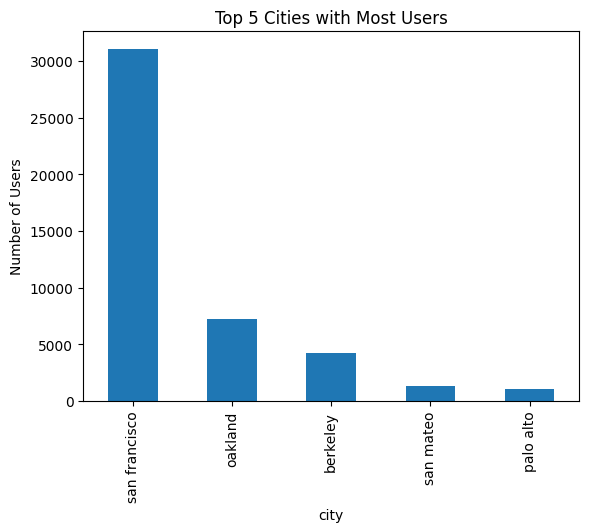

In [14]:
# Extract city and state from location
data['city'] = data['location'].str.split(',').str[0]
data['state'] = data['location'].str.split(',').str[1]

# Top 5 cities
top_cities = data['city'].value_counts().head(5)
top_cities.plot(kind='bar', title='Top 5 Cities with Most Users', ylabel='Number of Users')
plt.show()

## Part 4: Data Visualization

Visualizing patterns to extract meaningful insights.

### Age Distribution

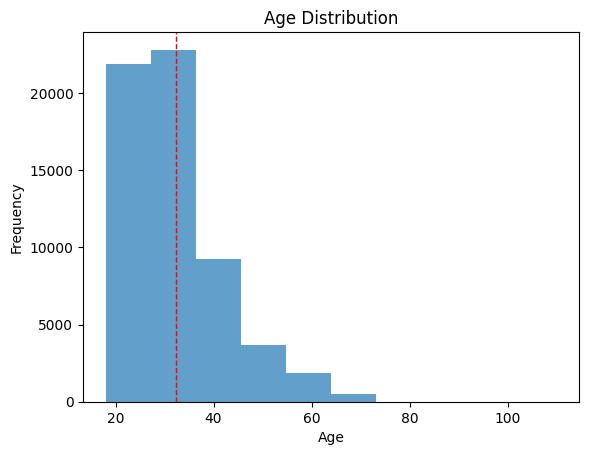

In [15]:
# Plot age distribution
data['age'].plot(kind='hist', bins=10, title='Age Distribution', alpha=0.7)
plt.axvline(data['age'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Income Analysis

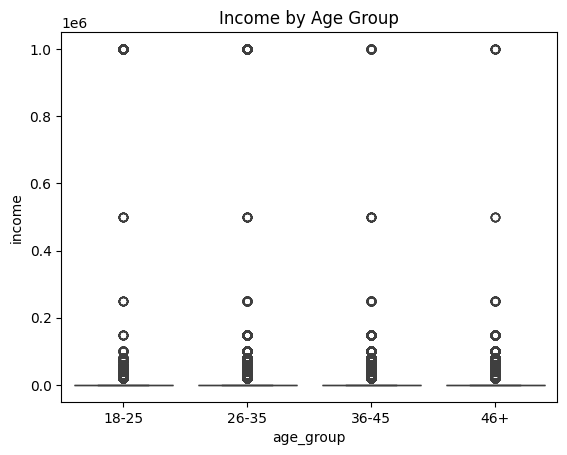

In [16]:
# Boxplot of income by age group
sns.boxplot(x='age_group', y='income', data=data)
plt.title('Income by Age Group')
plt.show()

### Analyzing `last_online` as a Date Field
Converting `last_online` into datetime format allows us to analyze user activity trends. We can derive:
- The distribution of last active dates.
- Most active days of the week.
- Recency of user activity (e.g., within a week, month, etc.).

datetime64[ns]


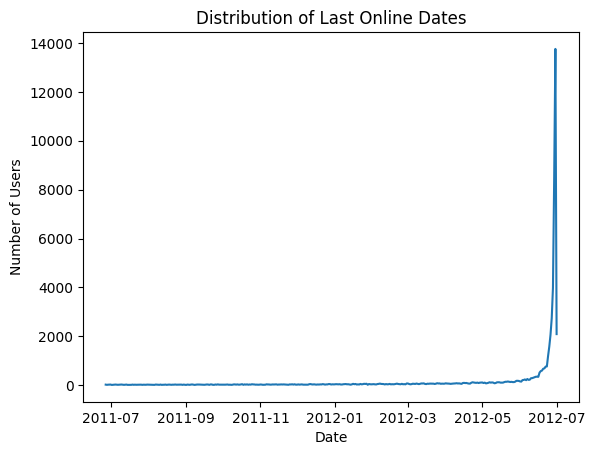

In [18]:
# Ensure 'last_online' is properly converted to datetime format
data['last_online'] = pd.to_datetime(data['last_online'], errors='coerce')

# Validate the conversion
print(data['last_online'].dtype)

# Proceed with datetime operations
data['last_online_date'] = data['last_online'].dt.date
last_online_distribution = data['last_online_date'].value_counts().sort_index()

# Plot distribution of last online dates
last_online_distribution.plot(kind='line', title='Distribution of Last Online Dates')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.show()

# 📊 **Insights and Recommendations for Bumble Profile Analysis**

## **1. Data Quality and Cleaning**
- **Insight:** Columns such as `diet`, `religion`, and `pets` have significant missing data (>30%). Additionally, `income` had placeholder values (-1) that needed replacement.
- **Recommendation:**
   - Continue monitoring data collection for fields with high missing values.
   - Encourage users to complete these fields during profile setup or provide incentives for completion.

---

## **2. Demographic Insights**
- **Insight:** The majority of users fall within the age groups of `26-35` and `36-45`. Gender and relationship status distributions show distinct patterns.
- **Recommendation:**
   - Tailor marketing campaigns to these age groups for maximum engagement.
   - Create features that align with preferences observed in these dominant demographics.

---

## **3. Income and Age Correlation**
- **Insight:** There is a moderate positive correlation between age and income.
- **Recommendation:**
   - Consider age-specific premium offerings tailored to financial capability.
   - Highlight user financial stability for transparency in profiles.

---

## **4. Dietary and Lifestyle Preferences**
- **Insight:** `Social drinkers` and users with a `mostly anything` diet dominate the data.
- **Recommendation:**
   - Promote events or communities focusing on shared lifestyle preferences.
   - Refine diet-related filters in search functionalities.

---

## **5. Geographical Trends**
- **Insight:** User concentration is highest in major cities like San Francisco and Oakland.
- **Recommendation:**
   - Regional campaigns should prioritize these high-user-density areas.
   - Explore features that facilitate local connections more effectively.

---

## **6. Profile Completeness**
- **Insight:** Profile completeness varies significantly, with many users missing key details.
- **Recommendation:**
   - Introduce profile completion badges or incentives.
   - Provide prompts for completing critical profile sections.

---

## **7. Data Visualization Effectiveness**
- **Insight:** Visualizations provided clarity on missing data, demographic trends, and correlations.
- **Recommendation:**
   - Integrate visual dashboards into operational analytics for continuous monitoring.
   - Use similar visual techniques for reporting to stakeholders.

---

## **Next Steps:**
1. Conduct A/B testing on incentives for profile completion.
2. Explore machine learning models to predict user engagement based on demographics.
3. Implement targeted ad campaigns for high-value segments.

By implementing these recommendations, Bumble can enhance user experience, improve data quality, and drive higher engagement across the platform. 🚀
